In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
import scipy.stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import optuna
#from xgboost import XGBRegressor
#from pycaret.regression import setup, compare_models, models
from scipy import stats
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Load the data

In [685]:
df_train = pd.read_csv('Ames_Housing_Price_Data.csv',index_col=0)

In [686]:
df_raw=df_train.copy()

## Examine the data

In [687]:
df_train.shape

(2580, 81)

In [688]:
df_train.head(10)

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1   909176150        856     126000          30       RL          NaN   
2   905476230       1049     139500         120       RL           42   
3   911128020       1001     124900          30  C (all)           60   
4   535377150       1039     114000          70       RL           80   
5   534177230       1665     227000          60       RL           70   
6   908128060       1922     198500          85       RL           64   
7   902135020        936      93000          20       RM           60   
8   528228540       1246     187687          20       RL           53   
9   923426010        889     137500          20       RL           74   
10  908186050       1072     140000         180       RM           35   

    LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1      7890   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
2      4235   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3      6060   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
4      8146   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
5      8400   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
6      7301   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
7      6000   Pave  Pave      Reg         Bnk    AllPub    Inside       Mod   
8      3710   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9     12395   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10     3675   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
1         SWISU       Norm       Norm     1Fam     1Story            6   
2       Edwards       Norm       Norm   TwnhsE     1Story            5   
3        IDOTRR       Norm       Norm     1Fam     1Story            5   
4       OldTown       Norm       Norm     1Fam     2Story            4   
5        NWAmes       Norm       Norm     1Fam     2Story            8   
6       Edwards       Norm       Norm     1Fam     SFoyer            7   
7       OldTown       Norm       Norm   2fmCon     1Story            4   
8       Blmngtn       Norm       Norm     1Fam     1Story            7   
9       Mitchel       Norm       Norm     1Fam     1Story            5   
10      Edwards       Norm       Norm   TwnhsE     SFoyer            6   

    OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
1             6       1939          1950     Gable  CompShg     Wd Sdng   
2             5       1984          1984     Gable  CompShg     HdBoard   
3             9       1930          2007       Hip  CompShg     MetalSd   
4             8       1900          2003     Gable  CompShg     MetalSd   
5             6       2001          2001     Gable  CompShg     VinylSd   
6             5       2003          2003     Gable  CompShg     HdBoard   
7             4       1953          1953     Gable  CompShg     MetalSd   
8             5       2007          2008     Gable  CompShg     WdShing   
9             6       1984          1984     Gable  CompShg     HdBoard   
10            5       2005          2005     Gable  CompShg     VinylSd   

   Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1      Wd Sdng       None           0        TA        TA     CBlock       TA   
2      HdBoard    BrkFace         149        Gd        TA     CBlock       Gd   
3      MetalSd       None           0        Gd        TA     BrkTil       TA   
4      MetalSd       None           0        Gd        Gd     BrkTil       Fa   
5      VinylSd       None           0        Gd        TA      PConc       Gd   
6      HdBoard    BrkFace         500        Gd        TA       Slab      NaN   
7      MetalSd       None           0        Fa        TA     CBlock       Fa   
8      Wd Shng    BrkFace          20        Gd

In [689]:
#Check the number of NAs in each column
df_train.isna().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

# Data Cleaning/Preprocessing

In [690]:
target=df_train.SalePrice

In [691]:
test_ids=df_train.PID

In [692]:
df_train=df_train.drop(columns=['PID', 'SalePrice'])

In [693]:
df_train_copy=df_train.copy()

### Use .info() to see length and dtypes

In [694]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   MSSubClass     2580 non-null   int64  
 2   MSZoning       2580 non-null   object 
 3   LotFrontage    2118 non-null   float64
 4   LotArea        2580 non-null   int64  
 5   Street         2580 non-null   object 
 6   Alley          168 non-null    object 
 7   LotShape       2580 non-null   object 
 8   LandContour    2580 non-null   object 
 9   Utilities      2580 non-null   object 
 10  LotConfig      2580 non-null   object 
 11  LandSlope      2580 non-null   object 
 12  Neighborhood   2580 non-null   object 
 13  Condition1     2580 non-null   object 
 14  Condition2     2580 non-null   object 
 15  BldgType       2580 non-null   object 
 16  HouseStyle     2580 non-null   object 
 17  OverallQual    2580 non-null   int64  
 18  OverallCo

## Identify numerical and categorical variables

In [695]:
cols_list=list(df_train.columns)
cols_list

['GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [696]:
#MSSUBClass is actually a categoical data coluumn per the data descrpition text file
df_train.MSSubClass=df_train.MSSubClass.astype(str)

In [697]:
#looking at columns that consist of numberic values only
df_train.select_dtypes("number")
#df_train._get_numeric_data()

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1          856          NaN     7890            6            6       1939   
2         1049           42     4235            5            5       1984   
3         1001           60     6060            5            9       1930   
4         1039           80     8146            4            8       1900   
5         1665           70     8400            8            6       2001   
..         ...          ...      ...          ...          ...        ...   
759        952          NaN     8854            6            6       1916   
760       1733          NaN    13680            3            5       1955   
761       2002           82     6270            5            6       1949   
762       1842          NaN     8826            7            5       2000   
763       1911           80     9554            8            5       1993   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1            1950           0         238           0        618          856   
2            1984         149         552         393        104         1049   
3            2007           0         737           0        100          837   
4            2003           0           0           0        405          405   
5            2001           0         643           0        167          810   
..            ...         ...         ...         ...        ...          ...   
759          1950           0           0           0        952          952   
760          1955           0           0           0          0            0   
761          1950           0         284           0        717         1001   
762          2000         144         841           0        144          985   
763          1994         125         380           0        397          777   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1         856         0             0             1             0         1   
2        1049         0             0             1             0         2   
3        1001         0             0             0             0         1   
4         717       322             0             0             0         1   
5         810       855             0             1             0         2   
..        ...       ...           ...           ...           ...       ...   
759       952         0             0             0             0         1   
760      1733         0             0             0             0         2   
761      1001      1001             0             0             0         2   
762       985       857             0             1             0         2   
763      1065       846             0             0             0         2   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1           0             2             1             4           1   
2           0             2             1             5           0   
3           0             2             1             5           0   
4           0             2             1             6           0   
5           1             3             1             6           0   
..        ...           ...           ...           ...         ...   
759         0             2             1             4           1   
760         0             4             1             8           1   
761         0             4             2             8           0   
762         1             3             1             7           1   
763         1             3             1             8           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1           1939           2         399           0            0   
2           1984           1         266           0          105   
3           1930           1         216         154            0   
4           1940           1 

# (Moved to later) Remove features based on correlation to avoid multicollinearity 

In [698]:
#corr=df_train.corr()
#plt.figure(figsize = (16, 16))
#sns.heatmap(corr,
#           xticklabels=corr.columns.values,
#           yticklabels=corr.columns.values, cmap="Blues")

#plt.title('Heatmap of Correlation Matrix')
#corr

In [699]:
#high_corr_pairs = np.where(abs(corr) > 0.7)
#high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs)
                                        #if x != y and x < y]
#high_corr_pairs

### Per the data description, 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF

GrLivArea=1stFlrSF+2ndFlrSF+LowQualFinSF

In [700]:
#Dropping numerical columns of which have high correaltion with one another
#df_train=df_train.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF"],axis=1)

## Data Inputation

### Categorical

In [701]:
#Show all column names with missing values
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [702]:
#Show all categorical/object columns with missing values
df_train.select_dtypes("object").isna().sum()!=0

MSSubClass       False
MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleConditi

In [703]:
#Fill NAs in these columns with None when a missing value means something
#e.g. NA basement means no basement

for column in ["Alley",
               "MasVnrType",
               "BsmtQual",
               "BsmtCond",
               "BsmtExposure",
               "BsmtFinType1",
               "BsmtFinType2",
               "FireplaceQu",
               "GarageType",
               "GarageFinish",
               "GarageQual",
               "GarageCond",
               "PoolQC",
               "Fence",
               "MiscFeature"]:
    df_train[column]=df_train[column].fillna("None")

In [704]:
#Fill NAs in these columns with mode
for column in ["MasVnrType","Electrical"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [705]:
df_train.select_dtypes("object").isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Numerical

In [706]:
df_train.select_dtypes("number").isna().sum()

GrLivArea          0
LotFrontage      462
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      129
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [707]:
#Show all numeric columns with missing values
df_train.select_dtypes("number").isna().sum()!=0

GrLivArea        False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
BsmtFullBath      True
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [708]:
for column in ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]:
    df_train[column]=df_train[column].fillna(df_train[column].median())

In [709]:
for column in ["GarageYrBlt"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [710]:
df_train.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43
Blueste    24
BrDale     21
BrkSide    52
ClearCr    81
CollgCr    70
Crawfor    70
Edwards    65
Gilbert    63
Greens     40
GrnHill   NaN
IDOTRR     60
Landmrk   NaN
MeadowV    21
Mitchel    72
NAmes      73
NPkVill    24
NWAmes     80
NoRidge    89
NridgHt    92
OldTown    60
SWISU      60
Sawyer     72
SawyerW    70
Somerst    72
StoneBr    60
Timber     81
Veenker    80
Name: LotFrontage, dtype: float64

In [711]:
df_train.loc[df_train["Neighborhood"].isin(['Landmrk','GrnHill'])]

GrLivArea MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
110       1502        120       RM          NaN     9763   Pave  None   
684       1295        120       RM          NaN     8239   Pave  None   
205       1320        160       RH          NaN     3612   Pave  None   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
110      IR1         Lvl    AllPub    Inside       Gtl      GrnHill   
684      IR1         Lvl    AllPub    Inside       Gtl      GrnHill   
205      IR1         Lvl    AllPub    Inside       Gtl      Landmrk   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
110       Norm       Norm   TwnhsE     1Story            7            5   
684       Norm       Norm   TwnhsE     1Story            7            5   
205       Norm       Norm    Twnhs     2Story            6            5   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
110       1998          1998     Gable  CompShg     Wd Sdng     Wd Sdng   
684       1986          1986     Gable  CompShg     BrkFace     Wd Sdng   
205       1993          1994     Gable  CompShg     VinylSd     VinylSd   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
110    BrkFace         239        Gd        TA      PConc       Gd       TA   
684       None           0        Gd        TA     CBlock     None     None   
205       None           0        TA        TA      PConc       Gd       TA   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
110           No          GLQ        1102          ALQ          72        328   
684         None         None           0         None           0          0   
205           No          GLQ         338          Unf           0        292   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
110         1502    GasA        Ex          Y      SBrkr      1502         0   
684            0    GasA        Gd          Y      SBrkr      1295         0   
205          630    GasA        Ex          Y      SBrkr       630       690   

     LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
110             0             1             0         1         1   
684             0             0             0         2         0   
205             0             0             0         2         1   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
110             1             1          Gd             5        Typ   
684             2             1          Gd             5        Typ   
205             3             1          TA             5        Typ   

     Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
110           1          TA     Attchd         1998          Fin           1   
684           0        None     Attchd         1986          RFn           1   
205           0        None     Detchd         1993          Unf           2   

     GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
110         286         TA         TA          Y           0            0   
684         312         TA         TA          Y           0            0   
205         484         TA         TA          Y           0           48   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence  \
110              0          0            0         0   None   None   
684              0          0            0         0   None   None   
205              0          0            0         0   None  MnPrv   

    MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  
110        None        0       9    2007      WD         Normal  
684        None        0      11    2006      WD         Normal  
205        None        0       6    2006      WD         Normal

In [712]:
#Impute missing values in LotFrontage with the median by Neighborhood 
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train.groupby("Neighborhood")['LotFrontage'].transform('median'))

In [713]:
#Fill the remaining 3NAs of LotFrontage with the Median of all LotFrontage
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

In [714]:
df_train.select_dtypes("number").isna().sum()

GrLivArea        0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [715]:
df_train.isna().sum()
#Check if there're still any missing values

GrLivArea        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Summarize numberical and categorical variables separately

In [716]:
df_train.describe(include=[np.number])

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
count       2580         2580     2580         2580         2580       2580   
mean        1486           69    10120            6            6       1970   
std          489           21     8127            1            1         30   
min          334           21     1300            1            1       1872   
25%         1112           60     7407            5            5       1953   
50%         1436           70     9391            6            5       1972   
75%         1733           80    11494            7            6       1999   
max         4676          313   215245           10            9       2010   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count          2580        2580        2580        2580       2580   
mean           1984          99         444          53        539   
std              20         176         429         174        425   
min            1950           0           0           0          0   
25%            1965           0           0           0        215   
50%            1992           0         384           0        448   
75%            2003         157         732           0        784   
max            2010        1600        2288        1526       2336   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
count         2580      2580      2580          2580          2580   
mean          1037      1145       337             4             0   
std            418       376       424            44             1   
min              0       334         0             0             0   
25%            792       872         0             0             0   
50%            979      1071         0             0             0   
75%           1266      1364       703             0             1   
max           3206      3820      1872          1064             3   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count          2580      2580      2580          2580          2580   
mean              0         2         0             3             1   
std               0         1         0             1             0   
min               0         0         0             0             0   
25%               0         1         0             2             1   
50%               0         2         0             3             1   
75%               0         2         1             3             1   
max               2         4         2             6             3   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count          2580        2580         2580        2580        2580   
mean              6           1         1978           2         467   
std               2           1           25           1         207   
min               2           0         1895           0           0   
25%               5           0         1961           1         318   
50%               6           1         1980           2         474   
75%               7           1         2002           2         576   
max              13           4         2010           5        1488   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count        2580         2580           2580       2580         2580   
mean           96           46             23          3           16   
std           129           66             64         25           57   
min             0            0              0          0            0   
25%             0            0              0          0            0   
50%             0           26              0          0            0   
75%           168           68              0          0            0   
max          1424          742           1012        508          576   

       PoolArea  MiscVal  MoSold  YrSold  
count      2580     2580    2580    2580  


In [717]:
df_train.describe(include=['O']) #The 'O' stands for objects

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count        2580     2580   2580  2580     2580        2580      2580   
unique         16        7      2     3        4           4         2   
top            20       RL   Pave  None      Reg         Lvl    AllPub   
freq          939     2008   2570  2412     1641        2337      2578   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       2580      2580         2580       2580       2580     2580   
unique         5         3           28          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1886      2458          410       2228       2555     2139   

       HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
count        2580      2580     2580        2580        2580       2580   
unique          8         6        7          15          16          4   
top        1Story     Gable  CompShg     VinylSd     VinylSd       None   
freq         1288      2059     2544         868         856       1573   

       ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
count       2580      2580       2580     2580     2580         2580   
unique         4         5          6        6        6            5   
top           TA        TA     CBlock       TA       TA           No   
freq        1636      2232       1140     1166     2316         1708   

       BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
count          2580         2580    2580      2580       2580       2580   
unique            7            7       6         5          2          4   
top             GLQ          Unf    GasA        Ex          Y      SBrkr   
freq            753         2180    2540      1293       2417       2366   

       KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual  \
count         2580       2580        2580       2580         2580       2580   
unique           5          7           6          7            4          6   
top             TA        Typ        None     Attchd          Unf         TA   
freq          1358       2399        1241       1527         1112       2312   

       GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
count        2580       2580   2580  2580        2580     2580          2580  
unique          6          3      5     5           5       10             6  
top            TA          Y   None  None        None      WD         Normal  
freq         2356       2336   2571  2055        2483     2392          2414

# Feature Transformations

In [718]:
df_train.select_dtypes("number")

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1          856           60     7890            6            6       1939   
2         1049           42     4235            5            5       1984   
3         1001           60     6060            5            9       1930   
4         1039           80     8146            4            8       1900   
5         1665           70     8400            8            6       2001   
..         ...          ...      ...          ...          ...        ...   
759        952           52     8854            6            6       1916   
760       1733           65    13680            3            5       1955   
761       2002           82     6270            5            6       1949   
762       1842           70     8826            7            5       2000   
763       1911           80     9554            8            5       1993   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1            1950           0         238           0        618          856   
2            1984         149         552         393        104         1049   
3            2007           0         737           0        100          837   
4            2003           0           0           0        405          405   
5            2001           0         643           0        167          810   
..            ...         ...         ...         ...        ...          ...   
759          1950           0           0           0        952          952   
760          1955           0           0           0          0            0   
761          1950           0         284           0        717         1001   
762          2000         144         841           0        144          985   
763          1994         125         380           0        397          777   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1         856         0             0             1             0         1   
2        1049         0             0             1             0         2   
3        1001         0             0             0             0         1   
4         717       322             0             0             0         1   
5         810       855             0             1             0         2   
..        ...       ...           ...           ...           ...       ...   
759       952         0             0             0             0         1   
760      1733         0             0             0             0         2   
761      1001      1001             0             0             0         2   
762       985       857             0             1             0         2   
763      1065       846             0             0             0         2   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1           0             2             1             4           1   
2           0             2             1             5           0   
3           0             2             1             5           0   
4           0             2             1             6           0   
5           1             3             1             6           0   
..        ...           ...           ...           ...         ...   
759         0             2             1             4           1   
760         0             4             1             8           1   
761         0             4             2             8           0   
762         1             3             1             7           1   
763         1             3             1             8           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1           1939           2         399           0            0   
2           1984           1         266           0          105   
3           1930           1         216         154            0   
4           1940           1 

In [719]:
numeric_cols=df_train.select_dtypes("number").columns

In [720]:
numeric_cols=pd.DataFrame(numeric_cols,columns=["Features"])

In [721]:
numeric_cols

Features
0       GrLivArea
1     LotFrontage
2         LotArea
3     OverallQual
4     OverallCond
5       YearBuilt
6    YearRemodAdd
7      MasVnrArea
8      BsmtFinSF1
9      BsmtFinSF2
10      BsmtUnfSF
11    TotalBsmtSF
12       1stFlrSF
13       2ndFlrSF
14   LowQualFinSF
15   BsmtFullBath
16   BsmtHalfBath
17       FullBath
18       HalfBath
19   BedroomAbvGr
20   KitchenAbvGr
21   TotRmsAbvGrd
22     Fireplaces
23    GarageYrBlt
24     GarageCars
25     GarageArea
26     WoodDeckSF
27    OpenPorchSF
28  EnclosedPorch
29      3SsnPorch
30    ScreenPorch
31       PoolArea
32        MiscVal
33         MoSold
34         YrSold

In [722]:
scipy.stats.skew(df_train.select_dtypes("number"))

array([ 0.97949483,  1.13817613, 13.06594054,  0.18699771,  0.62435313,
       -0.59782952, -0.43714372,  2.67256246,  0.80273372,  3.98997942,
        0.9625029 ,  0.51510019,  1.04310374,  0.82088649, 13.2527728 ,
        0.52862064,  3.7903816 ,  0.20599242,  0.66962427,  0.25366172,
        4.5286104 ,  0.66871261,  0.73477173, -0.68329032, -0.19127454,
        0.2468711 ,  1.84594824,  2.6037833 ,  4.03944974, 11.82338566,
        3.98830739, 19.8851274 , 21.27686429,  0.23279759,  0.09292702])

In [723]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew
#0 means no skew and normally distributed
#+ve number means right skew
#-ve number means left skew

Features  Skewness
0       GrLivArea         1
1     LotFrontage         1
2         LotArea        13
3     OverallQual         0
4     OverallCond         1
5       YearBuilt        -1
6    YearRemodAdd        -0
7      MasVnrArea         3
8      BsmtFinSF1         1
9      BsmtFinSF2         4
10      BsmtUnfSF         1
11    TotalBsmtSF         1
12       1stFlrSF         1
13       2ndFlrSF         1
14   LowQualFinSF        13
15   BsmtFullBath         1
16   BsmtHalfBath         4
17       FullBath         0
18       HalfBath         1
19   BedroomAbvGr         0
20   KitchenAbvGr         5
21   TotRmsAbvGrd         1
22     Fireplaces         1
23    GarageYrBlt        -1
24     GarageCars        -0
25     GarageArea         0
26     WoodDeckSF         2
27    OpenPorchSF         3
28  EnclosedPorch         4
29      3SsnPorch        12
30    ScreenPorch         4
31       PoolArea        20
32        MiscVal        21
33         MoSold         0
34         YrSold         0

In [724]:
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])

In [725]:
df_skew

Features  Skewness  Absolute_Skew
0       GrLivArea         1              1
1     LotFrontage         1              1
2         LotArea        13             13
3     OverallQual         0              0
4     OverallCond         1              1
5       YearBuilt        -1              1
6    YearRemodAdd        -0              0
7      MasVnrArea         3              3
8      BsmtFinSF1         1              1
9      BsmtFinSF2         4              4
10      BsmtUnfSF         1              1
11    TotalBsmtSF         1              1
12       1stFlrSF         1              1
13       2ndFlrSF         1              1
14   LowQualFinSF        13             13
15   BsmtFullBath         1              1
16   BsmtHalfBath         4              4
17       FullBath         0              0
18       HalfBath         1              1
19   BedroomAbvGr         0              0
20   KitchenAbvGr         5              5
21   TotRmsAbvGrd         1              1
22     Fireplaces         1              1
23    GarageYrBlt        -1              1
24     GarageCars        -0              0
25     GarageArea         0              0
26     WoodDeckSF         2              2
27    OpenPorchSF         3              3
28  EnclosedPorch         4              4
29      3SsnPorch        12             12
30    ScreenPorch         4              4
31       PoolArea        20             20
32        MiscVal        21             21
33         MoSold         0              0
34         YrSold         0              0

In [726]:
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)

In [727]:
#Looks like half of the features are skewed.... (Absolute Skew>0.75)
df_skew.sort_values("Absolute_Skew")

Features  Skewness  Absolute_Skew  Skewed
34         YrSold         0              0   False
3     OverallQual         0              0   False
24     GarageCars        -0              0   False
17       FullBath         0              0   False
33         MoSold         0              0   False
25     GarageArea         0              0   False
19   BedroomAbvGr         0              0   False
6    YearRemodAdd        -0              0   False
11    TotalBsmtSF         1              1   False
15   BsmtFullBath         1              1   False
5       YearBuilt        -1              1   False
4     OverallCond         1              1   False
21   TotRmsAbvGrd         1              1   False
18       HalfBath         1              1   False
23    GarageYrBlt        -1              1   False
22     Fireplaces         1              1   False
8      BsmtFinSF1         1              1    True
13       2ndFlrSF         1              1    True
10      BsmtUnfSF         1              1    True
0       GrLivArea         1              1    True
12       1stFlrSF         1              1    True
1     LotFrontage         1              1    True
26     WoodDeckSF         2              2    True
27    OpenPorchSF         3              3    True
7      MasVnrArea         3              3    True
16   BsmtHalfBath         4              4    True
30    ScreenPorch         4              4    True
9      BsmtFinSF2         4              4    True
28  EnclosedPorch         4              4    True
20   KitchenAbvGr         5              5    True
29      3SsnPorch        12             12    True
2         LotArea        13             13    True
14   LowQualFinSF        13             13    True
31       PoolArea        20             20    True
32        MiscVal        21             21    True

In [728]:
df_skew[df_skew.Skewed==True].Features.values
#get all the features which are skewed

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [729]:
df_skew[df_skew.Skewed==True].Features

0         GrLivArea
1       LotFrontage
2           LotArea
7        MasVnrArea
8        BsmtFinSF1
9        BsmtFinSF2
10        BsmtUnfSF
12         1stFlrSF
13         2ndFlrSF
14     LowQualFinSF
16     BsmtHalfBath
20     KitchenAbvGr
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
Name: Features, dtype: object

In [730]:
#Check to see how those skewed columns are distributed
df_train[df_skew[df_skew.Skewed==True].Features.values].describe()

GrLivArea  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count       2580         2580     2580        2580        2580        2580   
mean        1486           69    10120          99         444          53   
std          489           21     8127         176         429         174   
min          334           21     1300           0           0           0   
25%         1112           60     7407           0           0           0   
50%         1436           70     9391           0         384           0   
75%         1733           80    11494         157         732           0   
max         4676          313   215245        1600        2288        1526   

       BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtHalfBath  \
count       2580      2580      2580          2580          2580   
mean         539      1145       337             4             0   
std          425       376       424            44             0   
min            0       334         0             0             0   
25%          215       872         0             0             0   
50%          448      1071         0             0             0   
75%          784      1364       703             0             0   
max         2336      3820      1872          1064             2   

       KitchenAbvGr  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
count          2580        2580         2580           2580       2580   
mean              1          96           46             23          3   
std               0         129           66             64         25   
min               0           0            0              0          0   
25%               1           0            0              0          0   
50%               1           0           26              0          0   
75%               1         168           68              0          0   
max               3        1424          742           1012        508   

       ScreenPorch  PoolArea  MiscVal  
count         2580      2580     2580  
mean            16         2       49  
std             57        30      499  
min              0         0        0  
25%              0         0        0  
50%              0         0        0  
75%              0         0        0  
max            576       800    15500

In [731]:
df_before_feature_transformed=df_train.copy()

In [732]:
df_skewed_features=df_train[df_skew[df_skew.Skewed==True].Features.values]
df_skewed_features

GrLivArea  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1          856           60     7890           0         238           0   
2         1049           42     4235         149         552         393   
3         1001           60     6060           0         737           0   
4         1039           80     8146           0           0           0   
5         1665           70     8400           0         643           0   
..         ...          ...      ...         ...         ...         ...   
759        952           52     8854           0           0           0   
760       1733           65    13680           0           0           0   
761       2002           82     6270           0         284           0   
762       1842           70     8826         144         841           0   
763       1911           80     9554         125         380           0   

     BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtHalfBath  KitchenAbvGr  \
1          618       856         0             0             0             1   
2          104      1049         0             0             0             1   
3          100      1001         0             0             0             1   
4          405       717       322             0             0             1   
5          167       810       855             0             0             1   
..         ...       ...       ...           ...           ...           ...   
759        952       952         0             0             0             1   
760          0      1733         0             0             0             1   
761        717      1001      1001             0             0             2   
762        144       985       857             0             0             1   
763        397      1065       846             0             0             1   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
1             0            0              0          0          166         0   
2             0          105              0          0            0         0   
3           154            0             42         86            0         0   
4             0            0            168          0          111         0   
5             0           45              0          0            0         0   
..          ...          ...            ...        ...          ...       ...   
759           0           98              0          0           40         0   
760           0            0              0          0            0         0   
761           0            0              0          0            0         0   
762         193           96              0          0            0         0   
763         182           81              0          0            0         0   

     MiscVal  
1          0  
2          0  
3          0  
4          0  
5          0  
..       ...  
759        0  
760        0  
761        0  
762        0  
763        0  

[2580 rows x 19 columns]

In [733]:
lam = 0.15
for col in df_skewed_features.columns:
    df_train[col]=boxcox1p(df_train[col], lam)

In [734]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)
df_skew.sort_values("Absolute_Skew",ascending=False)
#The number of skewed feaetures has gone down from 16 to 11
#after the BoxCox1p transformation

Features  Skewness  Absolute_Skew  Skewed
31       PoolArea        17             17    True
29      3SsnPorch         9              9    True
14   LowQualFinSF         9              9    True
32        MiscVal         5              5    True
20   KitchenAbvGr         4              4    True
16   BsmtHalfBath         4              4    True
30    ScreenPorch         3              3    True
9      BsmtFinSF2         2              2    True
28  EnclosedPorch         2              2    True
10      BsmtUnfSF        -2              2    True
1     LotFrontage        -1              1    True
22     Fireplaces         1              1   False
23    GarageYrBlt        -1              1   False
18       HalfBath         1              1   False
21   TotRmsAbvGrd         1              1   False
7      MasVnrArea         1              1   False
4     OverallCond         1              1   False
5       YearBuilt        -1              1   False
8      BsmtFinSF1        -1              1   False
15   BsmtFullBath         1              1   False
11    TotalBsmtSF         1              1   False
6    YearRemodAdd        -0              0   False
13       2ndFlrSF         0              0   False
19   BedroomAbvGr         0              0   False
25     GarageArea         0              0   False
33         MoSold         0              0   False
2         LotArea         0              0   False
26     WoodDeckSF         0              0   False
17       FullBath         0              0   False
24     GarageCars        -0              0   False
3     OverallQual         0              0   False
12       1stFlrSF         0              0   False
27    OpenPorchSF         0              0   False
34         YrSold         0              0   False
0       GrLivArea         0              0   False

## Transform Months/Cyclincal Features With Cosine Wave 

In [735]:
df_train.MoSold.value_counts().index.sort_values() #Month Sold
#It's cyclical. However, models may not be able to tell 

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [736]:
#A negative cosine wave (y=-cos(x)) can represent this pattern, 
#where month 1 and month 12 are similar and start from the same point
#high values mean hot and low values mean cold
#-cos(0.5x)

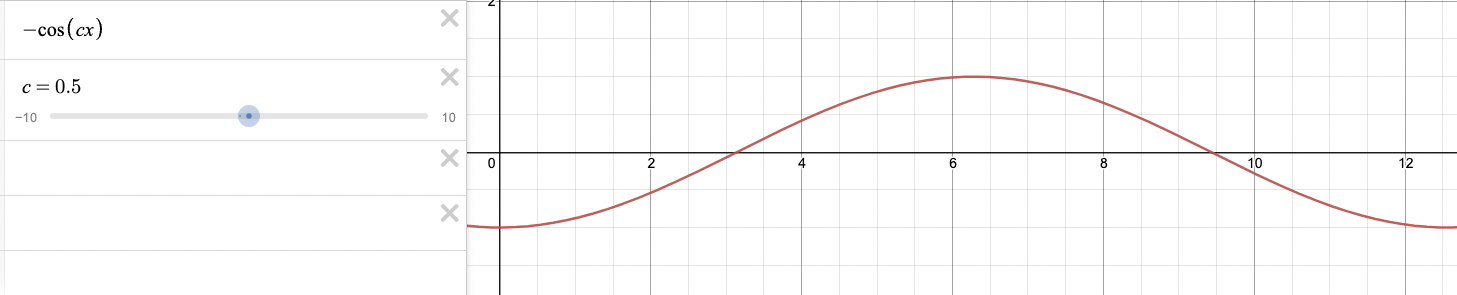

In [737]:
-np.cos(0.5*df_train.MoSold)

1     -0
2     -1
3     -1
4      1
5     -1
      ..
759    1
760    1
761    1
762    1
763    0
Name: MoSold, Length: 2580, dtype: float64

In [738]:
(-np.cos(0.5*df_train.MoSold)).describe()
#after the transformation, the min is closed to -1 and the max is closed to 1

count   2580
mean       0
std        1
min       -1
25%       -0
50%        1
75%        1
max        1
Name: MoSold, dtype: float64

In [739]:
df_train.MoSold=-np.cos(0.5*df_train.MoSold)

# Encode Categoical Columns (after ensuring the dtype of those columns is string)

In [740]:
df_train=pd.get_dummies(df_train, drop_first=True)

In [741]:
df_train.head()

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1         12            6       19            6            6       1939   
2         12            5       17            5            5       1984   
3         12            6       18            5            9       1930   
4         12            6       19            4            8       1900   
5         14            6       19            8            6       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1          1950           0           8           0         11          856   
2          1984           7          11          10          7         1049   
3          2007           0          11           0          7          837   
4          2003           0           0           0         10          405   
5          2001           0          11           0          8          810   

   1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1        12         0             0             1             0         1   
2        12         0             0             1             0         2   
3        12         0             0             0             0         1   
4        11         9             0             0             0         1   
5        12        12             0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1         0             2             1             4           1   
2         0             2             1             5           0   
3         0             2             1             5           0   
4         0             2             1             6           0   
5         1             3             1             6           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1         1939           2         399           0            0   
2         1984           1         266           0            7   
3         1930           1         216           8            0   
4         1940           1         281           0            0   
5         2001           2         528           0            5   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
1              0          0            8         0        0      -0    2010   
2              0          0            0         0        0      -1    2009   
3              5          6            0         0        0      -1    2007   
4              8          0            7         0        0       1    2009   
5              0          0            0         0        0      -1    2009   

   MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   
5               0               0               0               0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1              0              1              0              0              0   
2              0              0              0              0              0   
3              0              1              0              0              0   
4              0              0              0              0              0   
5              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0              0   
5              1         

# Standardization/Standard Scaling

In [742]:
standard=StandardScaler() #give each column the same range of values and centered around 0
standard.fit(df_train)
df_train=pd.DataFrame(standard.transform(df_train), index=df_train.index, columns=df_train.columns)

In [743]:
df_train

GrLivArea  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1           -2           -0       -0           -0            0         -1   
2           -1           -1       -1           -1           -1          0   
3           -1           -0       -1           -1            3         -1   
4           -1            1       -0           -1            2         -2   
5            0            0       -0            1            0          1   
..         ...          ...      ...          ...          ...        ...   
759         -1           -1       -0           -0            0         -2   
760          1           -0        1           -2           -1         -1   
761          1            1       -1           -1            0         -1   
762          1            0       -0            1           -1          1   
763          1            1        0            1           -1          1   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1              -2          -1           0          -0          0           -0   
2               0           1           1           3         -1            0   
3               1          -1           1          -0         -1           -0   
4               1          -1          -1          -0          0           -2   
5               1          -1           1          -0         -0           -1   
..            ...         ...         ...         ...        ...          ...   
759            -2          -1          -1          -0          1           -0   
760            -1          -1          -1          -0         -3           -2   
761            -2          -1           0          -0          1           -0   
762             1           1           1          -0         -1           -0   
763             1           1           0          -0          0           -1   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1          -1        -1            -0             1            -0        -1   
2          -0        -1            -0             1            -0         1   
3          -0        -1            -0            -1            -0        -1   
4          -1         1            -0            -1            -0        -1   
5          -1         1            -0             1            -0         1   
..        ...       ...           ...           ...           ...       ...   
759        -0        -1            -0            -1            -0        -1   
760         1        -1            -0            -1            -0         1   
761        -0         1            -0            -1            -0         1   
762        -0         1            -0             1            -0         1   
763        -0         1            -0            -1            -0         1   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1          -1            -1            -0            -2           1   
2          -1            -1            -0            -1          -1   
3          -1            -1            -0            -1          -1   
4          -1            -1            -0            -0          -1   
5           1             0            -0            -0          -1   
..        ...           ...           ...           ...         ...   
759        -1            -1            -0            -2           1   
760        -1             1            -0             1           1   
761        -1             1             5             1          -1   
762         1             0            -0             0           1   
763         1             0            -0             1           1   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1             -2           0          -0          -1           -1   
2              0          -1          -1          -1            1   
3             -2          -1          -1           1           -1   
4             -2          -1 

In [744]:
#In production, use pipeline to encode and standard scale
#pd.get_dummies(df_test)
#
#df_dummmied=pd.get_dummies()
#pipe = Pipeline(
#    [("standardize", StandardScaler()), ("df_dummmied", df_dummmied)])

# Target Transformation

<AxesSubplot:>

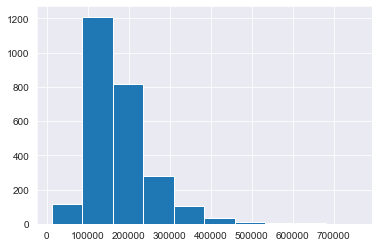

In [745]:
target.hist()
#the target Sale Price is right skewed

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


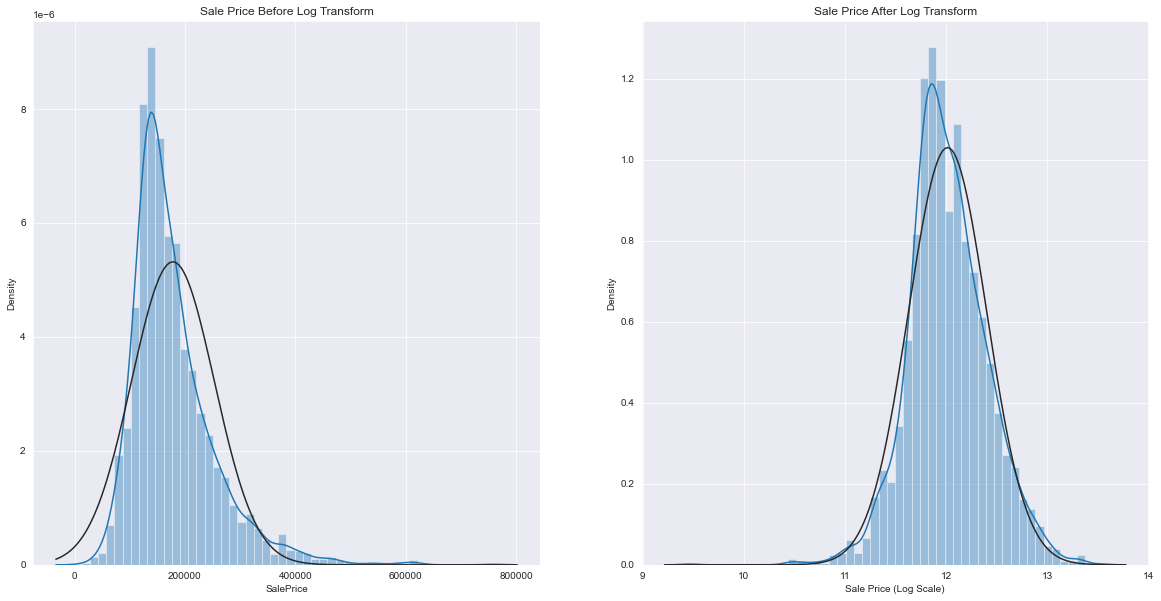

In [746]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Sale Price Before Log Transform")
sns.distplot(target,fit=scipy.stats.norm)
#the data's density plot does not lie up with a normal distrubtion very well

plt.subplot(1, 2, 2)
plt.title("Sale Price After Log Transform")
sns.distplot(np.log(target),fit=scipy.stats.norm)
plt.xlabel("Sale Price (Log Scale)")
#the data's density plot fits much better with a normal distrubtion after the log transmation
plt.show()

In [747]:
log_target=np.log(target)
#We're going to predict on the log Sale Price

In [748]:
#After making prediction with our modeals, 
#we need get back to the original Sale Price by exponentiating
np.exp(log_target)

1     126000
2     139500
3     124900
4     114000
5     227000
       ...  
759   121000
760   139600
761   145000
762   217500
763   215000
Name: SalePrice, Length: 2580, dtype: float64

# Forward Stepwise Selection

From the visiualization Notebook, we found that the correlation between the numerical features and the target

In [ ]:
top_corr_features=df_raw.corrwith(df_raw["SalePrice"]).sort_values(ascending=False)
top_corr_features

# Remove features based on VIF to avoid multicollinearity 

In [607]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant

In [608]:
#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif = pd.DataFrame()
#vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
#vif['variable'] = df_train.columns


#vif.sort_values("VIF", ascending=False)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF               variable
0     51              GrLivArea
1      4            LotFrontage
2      5                LotArea
3      5            OverallQual
4      3            OverallCond
5     17              YearBuilt
6      3           YearRemodAdd
7     19             MasVnrArea
8     22             BsmtFinSF1
9     32             BsmtFinSF2
10     5              BsmtUnfSF
11    10            TotalBsmtSF
12    36               1stFlrSF
13    61               2ndFlrSF
14     2           LowQualFinSF
15     3           BsmtFullBath
16     1           BsmtHalfBath
17     4               FullBath
18     3               HalfBath
19     3           BedroomAbvGr
20     5           KitchenAbvGr
21     5           TotRmsAbvGrd
22     7             Fireplaces
23     6            GarageYrBlt
24     8             GarageCars
25     7             GarageArea
26     2             WoodDeckSF
27     2            OpenPorchSF
28     2          EnclosedPorch
29     1              3SsnPorch
30     1            ScreenPorch
31   730               PoolArea
32    25                MiscVal
33     1                 MoSold
34     1                 YrSold
35     1         MSSubClass_150
36    10         MSSubClass_160
37     3         MSSubClass_180
38    40         MSSubClass_190
39   144          MSSubClass_20
40    30          MSSubClass_30
41     3          MSSubClass_40
42    11          MSSubClass_45
43    72          MSSubClass_50
44   119          MSSubClass_60
45    34          MSSubClass_70
46    10          MSSubClass_75
47    46          MSSubClass_80
48    15          MSSubClass_85
49   inf          MSSubClass_90
50    56       MSZoning_C (all)
51   349            MSZoning_FV
52     8       MSZoning_I (all)
53    69            MSZoning_RH
54  1417            MSZoning_RL
55  1131            MSZoning_RM
56     1            Street_Pave
57     3             Alley_None
58     2             Alley_Pave
59     1           LotShape_IR2
60     1           LotShape_IR3
61     2           LotShape_Reg
62     3        LandContour_HLS
63     2        LandContour_Low
64     3        LandContour_Lvl
65     2       Utilities_NoSewr
66     2      LotConfig_CulDSac
67     1          LotConfig_FR2
68     1          LotConfig_FR3
69     2       LotConfig_Inside
70     2          LandSlope_Mod
71     2          LandSlope_Sev
72     2   Neighborhood_Blueste
73     5    Neighborhood_BrDale
74    10   Neighborhood_BrkSide
75     4   Neighborhood_ClearCr
76    15   Neighborhood_CollgCr
77     8   Neighborhood_Crawfor
78    13   Neighborhood_Edwards
79    11   Neighborhood_Gilbert
80     2    Neighborhood_Greens
81     1   Neighborhood_GrnHill
82     9    Neighborhood_IDOTRR
83     1   Neighborhood_Landmrk
84     5   Neighborhood_MeadowV
85     8   Neighborhood_Mitchel
86    27     Neighborhood_NAmes
87     6   Neighborhood_NPkVill
88    10    Neighborhood_NWAmes
89     6   Neighborhood_NoRidge
90     9   Neighborhood_NridgHt
91    21   Neighborhood_OldTown
92     5     Neighborhood_SWISU
93    11    Neighborhood_Sawyer
94     8   Neighborhood_SawyerW
95    15   Neighborhood_Somerst
96     4   Neighborhood_StoneBr
97     5    Neighborhood_Timber
98     3   Neighborhood_Veenker
99     3       Condition1_Feedr
100    5        Condition1_Norm
101    2        Condition1_PosA
102    2        Condition1_PosN
103    2        Condition1_RRAe
104    2        Condition1_RRAn
105    1        Condition1_RRNe
106    1        Condition1_RRNn
107    6       Condition2_Feedr
108   11        Condition2_Norm
109    3        Condition2_PosA
110    3        Condition2_PosN
111    2        Condition2_RRAe
112    1        Condition2_RRAn
113    2        Condition2_RRNn
114   27        BldgType_2fmCon
115  inf        BldgType_Duplex
116   24         BldgType_Twnhs
117   44        BldgType_TwnhsE
118    7      HouseStyle_1.5Unf
119   61      HouseStyle_1Story
120    3      HouseStyle_2.5Fin
121    5      HouseStyle_2.5Unf
122   33      HouseStyle_2Story
123   11      HouseStyle_SFoyer
124  

In [609]:
#vif.sort_values("VIF", ascending=False)

VIF               variable
197  inf      BsmtFinType1_None
240  inf      GarageFinish_None
182  inf          BsmtQual_None
159  inf    Exterior2nd_PreCast
145  inf    Exterior1st_PreCast
250  inf        GarageCond_None
49   inf          MSSubClass_90
115  inf        BldgType_Duplex
245  inf        GarageQual_None
187  inf          BsmtCond_None
54  1417            MSZoning_RL
55  1131            MSZoning_RM
31   730               PoolArea
257  455            PoolQC_None
51   349            MSZoning_FV
247  192          GarageQual_TA
252  149          GarageCond_TA
39   144          MSSubClass_20
44   119          MSSubClass_60
162  114    Exterior2nd_VinylSd
125  112        RoofStyle_Gable
239  109        GarageType_None
147  108    Exterior1st_VinylSd
127  105          RoofStyle_Hip
189   91            BsmtCond_TA
263   89       MiscFeature_None
243   86          GarageQual_Fa
203   75      BsmtFinType2_None
43    72          MSSubClass_50
157   71    Exterior2nd_MetalSd
53    69            MSZoning_RH
143   67    Exterior1st_MetalSd
119   61      HouseStyle_1Story
13    61               2ndFlrSF
50    56       MSZoning_C (all)
141   56    Exterior1st_HdBoard
155   56    Exterior2nd_HdBoard
163   51    Exterior2nd_Wd Sdng
0     51              GrLivArea
166   49        MasVnrType_None
148   49    Exterior1st_Wd Sdng
248   49          GarageCond_Fa
47    46          MSSubClass_80
205   45       BsmtFinType2_Unf
206   45           Heating_GasA
117   44        BldgType_TwnhsE
38    40         MSSubClass_190
234   39      GarageType_Attchd
186   38            BsmtCond_Gd
12    36               1stFlrSF
193   36      BsmtExposure_None
154   36    Exterior2nd_CmentBd
158   35    Exterior2nd_Plywood
140   35    Exterior1st_CemntBd
185   34            BsmtCond_Fa
45    34          MSSubClass_70
174   34           ExterCond_TA
122   33      HouseStyle_2Story
265   33       MiscFeature_Shed
272   33           SaleType_New
280   33  SaleCondition_Partial
238   32      GarageType_Detchd
165   32     MasVnrType_BrkFace
9     32             BsmtFinSF2
40    30          MSSubClass_30
207   30           Heating_GasW
231   29       FireplaceQu_None
144   28    Exterior1st_Plywood
172   28           ExterCond_Gd
86    27     Neighborhood_NAmes
114   27        BldgType_2fmCon
32    25                MiscVal
124   25        HouseStyle_SLvl
116   24         BldgType_Twnhs
8     22             BsmtFinSF1
170   22           ExterQual_TA
91    21   Neighborhood_OldTown
255   19              PoolQC_Fa
256   19              PoolQC_Gd
7     19             MasVnrArea
244   17          GarageQual_Gd
5     17              YearBuilt
199   17       BsmtFinType1_Unf
169   17           ExterQual_Gd
230   16         FireplaceQu_Gd
233   16         FireplaceQu_TA
76    15   Neighborhood_CollgCr
48    15          MSSubClass_85
95    15   Neighborhood_Somerst
258   14              PoolQC_TA
138   13    Exterior1st_BrkFace
164   13    Exterior2nd_Wd Shng
78    13   Neighborhood_Edwards
228   13         Functional_Typ
222   12         KitchenQual_TA
184   12            BsmtQual_TA
249   11          GarageCond_Gd
167   11       MasVnrType_Stone
93    11    Neighborhood_Sawyer
42    11          MSSubClass_45
108   11        Condition2_Norm
236   11     GarageType_BuiltIn
123   11      HouseStyle_SFoyer
79    11   Neighborhood_Gilbert
74    10   Neighborhood_BrkSide
220   10         KitchenQual_Gd
11    10            TotalBsmtSF
46    10          MSSubClass_75
36    10         MSSubClass_160
88    10    Neighborhood_NWAmes
251   10          GarageCond_Po
208   10           Heating_Grav
82     9    Neighborhood_IDOTRR
152    9    Exterior2nd_BrkFace
90     9   Neighborhood_NridgHt
149    9    Exterior1st_WdShing
151    8    Exterior2nd_Brk Cmn
94     8   Neighborhood_SawyerW
85     8   Neighborhood_Mitchel
77     8   Neighborhood_Crawfor
52     8       MSZoning_I (all)
171    8           ExterCond_Fa
24     8             GarageCars
181    8            BsmtQual_Gd
176  

In [610]:
#def gen_vif(df):
#    vif = pd.DataFrame()
#    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#    vif['variable'] = df.columns
#    return vif.sort_values("VIF", ascending=False)

In [612]:
#df_train=df_train.drop(["BsmtFinType1_None","GarageFinish_None","BsmtQual_None","Exterior2nd_PreCast","Exterior1st_PreCast","GarageCond_None","MSSubClass_90","BldgType_Duplex","GarageQual_None","BsmtCond_None"],axis=1)

In [613]:
#gen_vif(df_train)

VIF               variable
53  1409            MSZoning_RL
54  1125            MSZoning_RM
31   730               PoolArea
247  455            PoolQC_None
50   347            MSZoning_FV
238  179          GarageQual_TA
242  144          GarageCond_TA
158  113    Exterior2nd_VinylSd
123  108        RoofStyle_Gable
144  108    Exterior1st_VinylSd
125  102          RoofStyle_Hip
253   88       MiscFeature_None
235   81          GarageQual_Fa
183   75            BsmtCond_TA
154   70    Exterior2nd_MetalSd
52    69            MSZoning_RH
141   67    Exterior1st_MetalSd
117   61      HouseStyle_1Story
13    61               2ndFlrSF
49    56       MSZoning_C (all)
139   56    Exterior1st_HdBoard
152   55    Exterior2nd_HdBoard
159   51    Exterior2nd_Wd Sdng
0     51              GrLivArea
162   49        MasVnrType_None
145   49    Exterior1st_Wd Sdng
239   47          GarageCond_Fa
232   46        GarageType_None
199   45           Heating_GasA
198   43       BsmtFinType2_Unf
227   39      GarageType_Attchd
196   38      BsmtFinType2_None
44    38          MSSubClass_60
12    36               1stFlrSF
151   36    Exterior2nd_CmentBd
155   35    Exterior2nd_Plywood
138   35    Exterior1st_CemntBd
170   33           ExterCond_TA
120   33      HouseStyle_2Story
255   33       MiscFeature_Shed
262   33           SaleType_New
270   33  SaleCondition_Partial
231   32      GarageType_Detchd
161   32     MasVnrType_BrkFace
181   32            BsmtCond_Gd
39    31          MSSubClass_20
9     30             BsmtFinSF2
200   30           Heating_GasW
224   29       FireplaceQu_None
180   28            BsmtCond_Fa
142   28    Exterior1st_Plywood
187   28      BsmtExposure_None
168   28           ExterCond_Gd
85    27     Neighborhood_NAmes
43    26          MSSubClass_50
32    25                MiscVal
38    25         MSSubClass_190
122   25        HouseStyle_SLvl
113   24        BldgType_2fmCon
166   22           ExterQual_TA
8     21             BsmtFinSF1
90    21   Neighborhood_OldTown
47    20          MSSubClass_80
245   19              PoolQC_Fa
246   19              PoolQC_Gd
7     19             MasVnrArea
5     17              YearBuilt
165   17           ExterQual_Gd
192   17       BsmtFinType1_Unf
223   16         FireplaceQu_Gd
226   16         FireplaceQu_TA
236   16          GarageQual_Gd
75    15   Neighborhood_CollgCr
94    15   Neighborhood_Somerst
248   14              PoolQC_TA
136   13    Exterior1st_BrkFace
160   13    Exterior2nd_Wd Shng
77    13   Neighborhood_Edwards
221   13         Functional_Typ
215   12         KitchenQual_TA
115   12        BldgType_TwnhsE
45    12          MSSubClass_70
179   12            BsmtQual_TA
163   11       MasVnrType_Stone
92    11    Neighborhood_Sawyer
240   11          GarageCond_Gd
107   11        Condition2_Norm
229   11     GarageType_BuiltIn
78    10   Neighborhood_Gilbert
121   10      HouseStyle_SFoyer
73    10   Neighborhood_BrkSide
213   10         KitchenQual_Gd
87    10    Neighborhood_NWAmes
36    10         MSSubClass_160
11    10            TotalBsmtSF
201   10           Heating_Grav
241    9          GarageCond_Po
81     9    Neighborhood_IDOTRR
149    9    Exterior2nd_BrkFace
89     9   Neighborhood_NridgHt
146    9    Exterior1st_WdShing
40     9          MSSubClass_30
148    8    Exterior2nd_Brk Cmn
93     8   Neighborhood_SawyerW
84     8   Neighborhood_Mitchel
114    8         BldgType_Twnhs
76     8   Neighborhood_Crawfor
51     8       MSZoning_I (all)
167    8           ExterCond_Fa
24     8             GarageCars
177    8            BsmtQual_Gd
172    8       Foundation_PConc
157    7     Exterior2nd_Stucco
42     7          MSSubClass_45
25     7             GarageArea
203    7           Heating_Wall
116    7      HouseStyle_1.5Unf
143    7     Exterior1st_Stucco
22     7             Fireplaces
171    6      Foundation_CBlock
106    6       Condition2_Feedr
86     6   Neighborhood_NPkVill
218    6        Functional_Min2
124    6      RoofStyle_Gambrel
88   

In [629]:
#df_train=df_train.drop(["MSZoning_RL","MSZoning_RM"], axis=1)

In [630]:
#gen_vif(df_train)

VIF               variable
218  177          GarageQual_TA
222  143          GarageCond_TA
138  111    Exterior2nd_VinylSd
124  106    Exterior1st_VinylSd
103  106        RoofStyle_Gable
105  100          RoofStyle_Hip
215   80          GarageQual_Fa
163   73            BsmtCond_TA
134   69    Exterior2nd_MetalSd
121   66    Exterior1st_MetalSd
119   55    Exterior1st_HdBoard
132   55    Exterior2nd_HdBoard
139   50    Exterior2nd_Wd Sdng
125   49    Exterior1st_Wd Sdng
219   47          GarageCond_Fa
179   44           Heating_GasA
212   43        GarageType_None
207   38      GarageType_Attchd
176   35      BsmtFinType2_None
131   35    Exterior2nd_CmentBd
142   35        MasVnrType_None
135   34    Exterior2nd_Plywood
118   34    Exterior1st_CemntBd
150   33           ExterCond_TA
242   33           SaleType_New
250   32  SaleCondition_Partial
141   32     MasVnrType_BrkFace
211   32      GarageType_Detchd
161   31            BsmtCond_Gd
180   29           Heating_GasW
204   29       FireplaceQu_None
122   28    Exterior1st_Plywood
148   28           ExterCond_Gd
160   28            BsmtCond_Fa
167   27      BsmtExposure_None
65    25     Neighborhood_NAmes
233   24       MiscFeature_None
235   23       MiscFeature_Shed
146   21           ExterQual_TA
145   16           ExterQual_Gd
203   16         FireplaceQu_Gd
206   16         FireplaceQu_TA
216   16          GarageQual_Gd
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
116   13    Exterior1st_BrkFace
140   13    Exterior2nd_Wd Shng
201   12         Functional_Typ
195   12         KitchenQual_TA
57    11   Neighborhood_Edwards
159   11            BsmtQual_TA
143   11       MasVnrType_Stone
220   11          GarageCond_Gd
209   10     GarageType_BuiltIn
72    10    Neighborhood_Sawyer
193   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
181    9           Heating_Grav
221    9          GarageCond_Po
67     9    Neighborhood_NWAmes
129    9    Exterior2nd_BrkFace
126    9    Exterior1st_WdShing
128    8    Exterior2nd_Brk Cmn
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
178    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
147    8           ExterCond_Fa
64     8   Neighborhood_Mitchel
17     8             GarageCars
157    7            BsmtQual_Gd
137    7     Exterior2nd_Stucco
56     7   Neighborhood_Crawfor
183    7           Heating_Wall
18     7             GarageArea
123    7     Exterior1st_Stucco
152    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
198    6        Functional_Min2
86     6       Condition2_Feedr
104    6      RoofStyle_Gambrel
151    6      Foundation_CBlock
97     6      HouseStyle_1Story
16     5            GarageYrBlt
6      5            TotalBsmtSF
68     5   Neighborhood_NoRidge
227    5            PoolQC_None
79     5        Condition1_Norm
100    5      HouseStyle_2Story
197    5        Functional_Min1
232    5             Fence_None
2      5            OverallQual
63     5   Neighborhood_MeadowV
1      5                LotArea
217    5          GarageQual_Po
14     5           TotRmsAbvGrd
76     4    Neighborhood_Timber
245    4           SaleType_WD 
71     4     Neighborhood_SWISU
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
94     4         BldgType_Twnhs
30     4          MSSubClass_75
106    4      RoofStyle_Mansard
0      4            LotFrontage
230    4            Fence_MnPrv
52     4    Neighborhood_BrDale
75     4   Neighborhood_StoneBr
172    4       BsmtFinType1_Unf
99     4      HouseStyle_2.5Unf
214    4       GarageFinish_Unf
202    4         FireplaceQu_Fa
199    4         Functional_Mod
153    3        Foundation_Slab
111    3       RoofMatl_Tar&Grv
182    3           Heating_OthW
169    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
225    3              PoolQC_Fa
10   

In [631]:
#df_train=df_train.drop(["GarageQual_TA","GarageCond_TA"], axis=1)

In [632]:
#gen_vif(df_train)

VIF               variable
138  111    Exterior2nd_VinylSd
124  106    Exterior1st_VinylSd
103  106        RoofStyle_Gable
105  100          RoofStyle_Hip
163   73            BsmtCond_TA
134   69    Exterior2nd_MetalSd
121   66    Exterior1st_MetalSd
119   55    Exterior1st_HdBoard
132   55    Exterior2nd_HdBoard
139   50    Exterior2nd_Wd Sdng
125   49    Exterior1st_Wd Sdng
179   44           Heating_GasA
207   38      GarageType_Attchd
176   35      BsmtFinType2_None
131   35    Exterior2nd_CmentBd
142   35        MasVnrType_None
135   34    Exterior2nd_Plywood
118   34    Exterior1st_CemntBd
150   33           ExterCond_TA
240   33           SaleType_New
248   32  SaleCondition_Partial
141   32     MasVnrType_BrkFace
211   32      GarageType_Detchd
161   31            BsmtCond_Gd
180   29           Heating_GasW
204   29       FireplaceQu_None
122   28    Exterior1st_Plywood
148   28           ExterCond_Gd
160   28            BsmtCond_Fa
167   27      BsmtExposure_None
65    25     Neighborhood_NAmes
231   24       MiscFeature_None
233   23       MiscFeature_Shed
146   21           ExterQual_TA
145   16           ExterQual_Gd
203   16         FireplaceQu_Gd
206   16         FireplaceQu_TA
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
116   13    Exterior1st_BrkFace
140   13    Exterior2nd_Wd Shng
212   12        GarageType_None
201   12         Functional_Typ
195   12         KitchenQual_TA
57    11   Neighborhood_Edwards
159   11            BsmtQual_TA
143   11       MasVnrType_Stone
209   10     GarageType_BuiltIn
72    10    Neighborhood_Sawyer
193   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
181    9           Heating_Grav
67     9    Neighborhood_NWAmes
129    9    Exterior2nd_BrkFace
126    9    Exterior1st_WdShing
128    8    Exterior2nd_Brk Cmn
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
178    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
147    8           ExterCond_Fa
64     8   Neighborhood_Mitchel
17     8             GarageCars
157    7            BsmtQual_Gd
137    7     Exterior2nd_Stucco
56     7   Neighborhood_Crawfor
183    7           Heating_Wall
18     7             GarageArea
123    7     Exterior1st_Stucco
152    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
198    6        Functional_Min2
86     6       Condition2_Feedr
104    6      RoofStyle_Gambrel
151    6      Foundation_CBlock
97     6      HouseStyle_1Story
6      5            TotalBsmtSF
16     5            GarageYrBlt
68     5   Neighborhood_NoRidge
225    5            PoolQC_None
79     5        Condition1_Norm
197    5        Functional_Min1
100    5      HouseStyle_2Story
230    5             Fence_None
2      5            OverallQual
63     5   Neighborhood_MeadowV
1      5                LotArea
14     5           TotRmsAbvGrd
76     4    Neighborhood_Timber
243    4           SaleType_WD 
71     4     Neighborhood_SWISU
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
94     4         BldgType_Twnhs
106    4      RoofStyle_Mansard
0      4            LotFrontage
30     4          MSSubClass_75
228    4            Fence_MnPrv
52     4    Neighborhood_BrDale
75     4   Neighborhood_StoneBr
172    4       BsmtFinType1_Unf
202    4         FireplaceQu_Fa
214    4       GarageFinish_Unf
199    4         Functional_Mod
153    3        Foundation_Slab
111    3       RoofMatl_Tar&Grv
99     3      HouseStyle_2.5Unf
182    3           Heating_OthW
169    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
223    3              PoolQC_Fa
10     3               FullBath
166    3        BsmtExposure_No
95     3        BldgType_TwnhsE
78     3       Condition1_Feedr
247    3   SaleCondition_Normal
4      3           YearRemodAdd
177    3       BsmtFinType2_Rec
5      3              BsmtUnfSF
133  

In [633]:
#df_train=df_train.drop(["Exterior2nd_VinylSd","Exterior1st_VinylSd"], axis=1)

In [634]:
#gen_vif(df_train)

VIF               variable
103  106        RoofStyle_Gable
105  100          RoofStyle_Hip
161   73            BsmtCond_TA
177   44           Heating_GasA
205   38      GarageType_Attchd
174   35      BsmtFinType2_None
140   35        MasVnrType_None
148   33           ExterCond_TA
238   33           SaleType_New
246   32  SaleCondition_Partial
139   32     MasVnrType_BrkFace
209   32      GarageType_Detchd
159   31            BsmtCond_Gd
178   29           Heating_GasW
118   29    Exterior1st_CemntBd
130   29    Exterior2nd_CmentBd
202   29       FireplaceQu_None
133   29    Exterior2nd_MetalSd
121   28    Exterior1st_MetalSd
146   28           ExterCond_Gd
158   28            BsmtCond_Fa
165   27      BsmtExposure_None
65    25     Neighborhood_NAmes
229   24       MiscFeature_None
231   23       MiscFeature_Shed
144   21           ExterQual_TA
119   20    Exterior1st_HdBoard
131   19    Exterior2nd_HdBoard
124   17    Exterior1st_Wd Sdng
143   16           ExterQual_Gd
137   16    Exterior2nd_Wd Sdng
201   16         FireplaceQu_Gd
204   16         FireplaceQu_TA
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
210   12        GarageType_None
199   12         Functional_Typ
193   12         KitchenQual_TA
134   12    Exterior2nd_Plywood
57    11   Neighborhood_Edwards
157   11            BsmtQual_TA
141   11       MasVnrType_Stone
122   10    Exterior1st_Plywood
207   10     GarageType_BuiltIn
72    10    Neighborhood_Sawyer
191   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
179    9           Heating_Grav
67     9    Neighborhood_NWAmes
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
176    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
145    8           ExterCond_Fa
64     8   Neighborhood_Mitchel
17     7             GarageCars
155    7            BsmtQual_Gd
56     7   Neighborhood_Crawfor
181    7           Heating_Wall
18     7             GarageArea
150    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
127    6    Exterior2nd_Brk Cmn
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
196    6        Functional_Min2
86     6       Condition2_Feedr
104    6      RoofStyle_Gambrel
149    6      Foundation_CBlock
97     6      HouseStyle_1Story
116    6    Exterior1st_BrkFace
6      5            TotalBsmtSF
16     5            GarageYrBlt
68     5   Neighborhood_NoRidge
223    5            PoolQC_None
79     5        Condition1_Norm
100    5      HouseStyle_2Story
195    5        Functional_Min1
228    5             Fence_None
2      5            OverallQual
63     5   Neighborhood_MeadowV
1      5                LotArea
14     4           TotRmsAbvGrd
76     4    Neighborhood_Timber
128    4    Exterior2nd_BrkFace
241    4           SaleType_WD 
71     4     Neighborhood_SWISU
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
94     4         BldgType_Twnhs
138    4    Exterior2nd_Wd Shng
106    4      RoofStyle_Mansard
0      4            LotFrontage
30     4          MSSubClass_75
226    4            Fence_MnPrv
52     4    Neighborhood_BrDale
136    4     Exterior2nd_Stucco
123    4     Exterior1st_Stucco
75     4   Neighborhood_StoneBr
170    4       BsmtFinType1_Unf
200    4         FireplaceQu_Fa
212    4       GarageFinish_Unf
197    3         Functional_Mod
151    3        Foundation_Slab
111    3       RoofMatl_Tar&Grv
99     3      HouseStyle_2.5Unf
125    3    Exterior1st_WdShing
180    3           Heating_OthW
167    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
221    3              PoolQC_Fa
10     3               FullBath
164    3        BsmtExposure_No
95     3        BldgType_TwnhsE
78     3       Condition1_Feedr
245    3   SaleCondition_Normal
175    3       BsmtFinType2_Rec
4      3           YearRemodAdd
5      3              BsmtUnfSF
12     3           BedroomAbvGr
173    3       BsmtFinType2_LwQ
206  

In [635]:
#df_train=df_train.drop(["RoofStyle_Gable","RoofStyle_Hip"], axis=1)

In [637]:
#gen_vif(df_train)

VIF               variable
159   73            BsmtCond_TA
175   44           Heating_GasA
203   38      GarageType_Attchd
172   35      BsmtFinType2_None
138   35        MasVnrType_None
146   33           ExterCond_TA
236   33           SaleType_New
244   32  SaleCondition_Partial
137   32     MasVnrType_BrkFace
207   32      GarageType_Detchd
157   31            BsmtCond_Gd
116   29    Exterior1st_CemntBd
176   29           Heating_GasW
128   29    Exterior2nd_CmentBd
200   29       FireplaceQu_None
131   29    Exterior2nd_MetalSd
119   28    Exterior1st_MetalSd
144   28           ExterCond_Gd
156   28            BsmtCond_Fa
163   27      BsmtExposure_None
65    25     Neighborhood_NAmes
227   24       MiscFeature_None
229   23       MiscFeature_Shed
142   21           ExterQual_TA
117   20    Exterior1st_HdBoard
129   19    Exterior2nd_HdBoard
122   17    Exterior1st_Wd Sdng
141   16           ExterQual_Gd
135   16    Exterior2nd_Wd Sdng
199   16         FireplaceQu_Gd
202   16         FireplaceQu_TA
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
208   12        GarageType_None
197   12         Functional_Typ
191   12         KitchenQual_TA
132   12    Exterior2nd_Plywood
57    11   Neighborhood_Edwards
155   11            BsmtQual_TA
139   11       MasVnrType_Stone
120   10    Exterior1st_Plywood
205   10     GarageType_BuiltIn
72    10    Neighborhood_Sawyer
189   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
177    9           Heating_Grav
67     9    Neighborhood_NWAmes
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
174    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
143    8           ExterCond_Fa
64     8   Neighborhood_Mitchel
17     7             GarageCars
153    7            BsmtQual_Gd
56     7   Neighborhood_Crawfor
179    7           Heating_Wall
18     7             GarageArea
148    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
125    6    Exterior2nd_Brk Cmn
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
194    6        Functional_Min2
86     6       Condition2_Feedr
147    6      Foundation_CBlock
114    6    Exterior1st_BrkFace
97     6      HouseStyle_1Story
6      5            TotalBsmtSF
16     5            GarageYrBlt
68     5   Neighborhood_NoRidge
221    5            PoolQC_None
79     5        Condition1_Norm
193    5        Functional_Min1
100    5      HouseStyle_2Story
226    5             Fence_None
2      5            OverallQual
63     5   Neighborhood_MeadowV
1      5                LotArea
14     4           TotRmsAbvGrd
76     4    Neighborhood_Timber
239    4           SaleType_WD 
71     4     Neighborhood_SWISU
126    4    Exterior2nd_BrkFace
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
94     4         BldgType_Twnhs
136    4    Exterior2nd_Wd Shng
0      4            LotFrontage
30     4          MSSubClass_75
224    4            Fence_MnPrv
52     4    Neighborhood_BrDale
134    4     Exterior2nd_Stucco
121    4     Exterior1st_Stucco
75     4   Neighborhood_StoneBr
168    4       BsmtFinType1_Unf
198    4         FireplaceQu_Fa
210    4       GarageFinish_Unf
195    3         Functional_Mod
149    3        Foundation_Slab
99     3      HouseStyle_2.5Unf
123    3    Exterior1st_WdShing
178    3           Heating_OthW
165    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
219    3              PoolQC_Fa
10     3               FullBath
95     3        BldgType_TwnhsE
162    3        BsmtExposure_No
78     3       Condition1_Feedr
243    3   SaleCondition_Normal
173    3       BsmtFinType2_Rec
4      3           YearRemodAdd
5      3              BsmtUnfSF
12     3           BedroomAbvGr
171    3       BsmtFinType2_LwQ
204    3     GarageType_Basment
222    3              PoolQC_TA
140    3           ExterQual_Fa
77     3   Neighborhood_Veenker
152    3            BsmtQual_Fa
11   

In [638]:
#df_train=df_train.drop("BsmtCond_TA", axis=1)

In [639]:
#gen_vif(df_train)

VIF               variable
174   44           Heating_GasA
202   38      GarageType_Attchd
138   35        MasVnrType_None
235   33           SaleType_New
146   33           ExterCond_TA
243   32  SaleCondition_Partial
137   32     MasVnrType_BrkFace
206   32      GarageType_Detchd
116   29    Exterior1st_CemntBd
175   29           Heating_GasW
128   29    Exterior2nd_CmentBd
199   29       FireplaceQu_None
131   28    Exterior2nd_MetalSd
119   28    Exterior1st_MetalSd
144   27           ExterCond_Gd
171   27      BsmtFinType2_None
162   25      BsmtExposure_None
65    25     Neighborhood_NAmes
226   24       MiscFeature_None
228   23       MiscFeature_Shed
142   21           ExterQual_TA
117   20    Exterior1st_HdBoard
129   19    Exterior2nd_HdBoard
122   17    Exterior1st_Wd Sdng
141   16           ExterQual_Gd
198   16         FireplaceQu_Gd
201   16         FireplaceQu_TA
135   16    Exterior2nd_Wd Sdng
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
207   12        GarageType_None
196   12         Functional_Typ
190   12         KitchenQual_TA
132   11    Exterior2nd_Plywood
57    11   Neighborhood_Edwards
155   11            BsmtQual_TA
139   11       MasVnrType_Stone
120   10    Exterior1st_Plywood
204   10     GarageType_BuiltIn
72    10    Neighborhood_Sawyer
188   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
176    9           Heating_Grav
67     9    Neighborhood_NWAmes
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
173    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
64     8   Neighborhood_Mitchel
143    8           ExterCond_Fa
17     7             GarageCars
153    7            BsmtQual_Gd
56     7   Neighborhood_Crawfor
178    7           Heating_Wall
18     7             GarageArea
148    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
125    6    Exterior2nd_Brk Cmn
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
193    6        Functional_Min2
86     6       Condition2_Feedr
147    6      Foundation_CBlock
97     6      HouseStyle_1Story
114    6    Exterior1st_BrkFace
6      5            TotalBsmtSF
16     5            GarageYrBlt
68     5   Neighborhood_NoRidge
220    5            PoolQC_None
79     5        Condition1_Norm
192    5        Functional_Min1
100    5      HouseStyle_2Story
225    5             Fence_None
2      5            OverallQual
63     5   Neighborhood_MeadowV
1      5                LotArea
14     4           TotRmsAbvGrd
76     4    Neighborhood_Timber
238    4           SaleType_WD 
71     4     Neighborhood_SWISU
126    4    Exterior2nd_BrkFace
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
94     4         BldgType_Twnhs
136    4    Exterior2nd_Wd Shng
0      4            LotFrontage
30     4          MSSubClass_75
223    4            Fence_MnPrv
52     4    Neighborhood_BrDale
134    4     Exterior2nd_Stucco
121    4     Exterior1st_Stucco
75     4   Neighborhood_StoneBr
167    4       BsmtFinType1_Unf
197    4         FireplaceQu_Fa
209    4       GarageFinish_Unf
194    3         Functional_Mod
149    3        Foundation_Slab
99     3      HouseStyle_2.5Unf
123    3    Exterior1st_WdShing
177    3           Heating_OthW
164    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
218    3              PoolQC_Fa
10     3               FullBath
95     3        BldgType_TwnhsE
161    3        BsmtExposure_No
78     3       Condition1_Feedr
242    3   SaleCondition_Normal
172    3       BsmtFinType2_Rec
4      3           YearRemodAdd
12     3           BedroomAbvGr
5      3              BsmtUnfSF
170    3       BsmtFinType2_LwQ
203    3     GarageType_Basment
221    3              PoolQC_TA
140    3           ExterQual_Fa
77     3   Neighborhood_Veenker
152    3            BsmtQual_Fa
11     3               HalfBath
200    3         FireplaceQu_Po
41     3        LandContour_HLS
124  

In [640]:
#df_train=df_train.drop("Heating_GasA", axis=1)

In [641]:
#gen_vif(df_train)

VIF               variable
201   38      GarageType_Attchd
138   35        MasVnrType_None
234   33           SaleType_New
146   33           ExterCond_TA
242   32  SaleCondition_Partial
137   32     MasVnrType_BrkFace
205   32      GarageType_Detchd
116   29    Exterior1st_CemntBd
128   29    Exterior2nd_CmentBd
198   29       FireplaceQu_None
131   28    Exterior2nd_MetalSd
119   28    Exterior1st_MetalSd
144   27           ExterCond_Gd
171   27      BsmtFinType2_None
162   25      BsmtExposure_None
65    25     Neighborhood_NAmes
225   24       MiscFeature_None
227   23       MiscFeature_Shed
142   21           ExterQual_TA
117   20    Exterior1st_HdBoard
129   19    Exterior2nd_HdBoard
122   17    Exterior1st_Wd Sdng
141   16           ExterQual_Gd
197   16         FireplaceQu_Gd
200   16         FireplaceQu_TA
135   16    Exterior2nd_Wd Sdng
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
206   12        GarageType_None
195   12         Functional_Typ
189   12         KitchenQual_TA
132   11    Exterior2nd_Plywood
57    11   Neighborhood_Edwards
155   11            BsmtQual_TA
139   11       MasVnrType_Stone
120   10    Exterior1st_Plywood
203   10     GarageType_BuiltIn
72    10    Neighborhood_Sawyer
187   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
67     9    Neighborhood_NWAmes
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
173    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
64     8   Neighborhood_Mitchel
143    8           ExterCond_Fa
17     7             GarageCars
153    7            BsmtQual_Gd
56     7   Neighborhood_Crawfor
18     7             GarageArea
148    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
125    6    Exterior2nd_Brk Cmn
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
192    6        Functional_Min2
86     6       Condition2_Feedr
147    6      Foundation_CBlock
97     6      HouseStyle_1Story
114    6    Exterior1st_BrkFace
6      5            TotalBsmtSF
16     5            GarageYrBlt
68     5   Neighborhood_NoRidge
219    5            PoolQC_None
79     5        Condition1_Norm
191    5        Functional_Min1
100    5      HouseStyle_2Story
224    5             Fence_None
2      5            OverallQual
63     5   Neighborhood_MeadowV
1      5                LotArea
14     4           TotRmsAbvGrd
76     4    Neighborhood_Timber
237    4           SaleType_WD 
71     4     Neighborhood_SWISU
126    4    Exterior2nd_BrkFace
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
94     4         BldgType_Twnhs
136    4    Exterior2nd_Wd Shng
0      4            LotFrontage
30     4          MSSubClass_75
222    4            Fence_MnPrv
52     4    Neighborhood_BrDale
134    4     Exterior2nd_Stucco
121    4     Exterior1st_Stucco
75     4   Neighborhood_StoneBr
167    4       BsmtFinType1_Unf
196    4         FireplaceQu_Fa
208    4       GarageFinish_Unf
193    3         Functional_Mod
99     3      HouseStyle_2.5Unf
149    3        Foundation_Slab
123    3    Exterior1st_WdShing
164    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
217    3              PoolQC_Fa
10     3               FullBath
95     3        BldgType_TwnhsE
161    3        BsmtExposure_No
78     3       Condition1_Feedr
241    3   SaleCondition_Normal
172    3       BsmtFinType2_Rec
4      3           YearRemodAdd
12     3           BedroomAbvGr
5      3              BsmtUnfSF
170    3       BsmtFinType2_LwQ
202    3     GarageType_Basment
220    3              PoolQC_TA
140    3           ExterQual_Fa
77     3   Neighborhood_Veenker
152    3            BsmtQual_Fa
11     3               HalfBath
199    3         FireplaceQu_Po
41     3        LandContour_HLS
124    3    Exterior2nd_AsphShn
36     3             Alley_None
186    2         KitchenQual_Fa
168    2       BsmtFinType2_BLQ
228    2       MiscFeature_TenC
37   

In [642]:
#df_train=df_train.drop("GarageType_Attchd", axis=1)

In [643]:
#gen_vif(df_train)

VIF               variable
138   35        MasVnrType_None
233   33           SaleType_New
146   33           ExterCond_TA
241   32  SaleCondition_Partial
137   32     MasVnrType_BrkFace
116   29    Exterior1st_CemntBd
128   29    Exterior2nd_CmentBd
198   29       FireplaceQu_None
131   28    Exterior2nd_MetalSd
119   28    Exterior1st_MetalSd
144   27           ExterCond_Gd
171   27      BsmtFinType2_None
162   25      BsmtExposure_None
65    25     Neighborhood_NAmes
224   24       MiscFeature_None
226   23       MiscFeature_Shed
142   21           ExterQual_TA
117   20    Exterior1st_HdBoard
129   19    Exterior2nd_HdBoard
122   17    Exterior1st_Wd Sdng
141   16           ExterQual_Gd
197   16         FireplaceQu_Gd
200   16         FireplaceQu_TA
135   16    Exterior2nd_Wd Sdng
70    15   Neighborhood_OldTown
55    14   Neighborhood_CollgCr
74    14   Neighborhood_Somerst
195   12         Functional_Typ
189   12         KitchenQual_TA
132   11    Exterior2nd_Plywood
57    11   Neighborhood_Edwards
155   11            BsmtQual_TA
139   11       MasVnrType_Stone
120   10    Exterior1st_Plywood
72    10    Neighborhood_Sawyer
187   10         KitchenQual_Gd
87    10        Condition2_Norm
58    10   Neighborhood_Gilbert
67     9    Neighborhood_NWAmes
53     8   Neighborhood_BrkSide
69     8   Neighborhood_NridgHt
173    8       BsmtFinType2_Unf
73     8   Neighborhood_SawyerW
64     8   Neighborhood_Mitchel
143    8           ExterCond_Fa
17     7             GarageCars
153    7            BsmtQual_Gd
56     7   Neighborhood_Crawfor
18     7             GarageArea
148    7       Foundation_PConc
15     7             Fireplaces
61     7    Neighborhood_IDOTRR
125    6    Exterior2nd_Brk Cmn
66     6   Neighborhood_NPkVill
32     6            MSZoning_FV
192    6        Functional_Min2
86     6       Condition2_Feedr
147    6      Foundation_CBlock
97     6      HouseStyle_1Story
114    6    Exterior1st_BrkFace
6      5            TotalBsmtSF
16     5            GarageYrBlt
68     5   Neighborhood_NoRidge
218    5            PoolQC_None
79     5        Condition1_Norm
191    5        Functional_Min1
100    5      HouseStyle_2Story
223    5             Fence_None
63     5   Neighborhood_MeadowV
2      5            OverallQual
1      5                LotArea
14     4           TotRmsAbvGrd
76     4    Neighborhood_Timber
236    4           SaleType_WD 
71     4     Neighborhood_SWISU
126    4    Exterior2nd_BrkFace
27     4         MSSubClass_160
54     4   Neighborhood_ClearCr
205    4        GarageType_None
94     4         BldgType_Twnhs
136    4    Exterior2nd_Wd Shng
0      4            LotFrontage
30     4          MSSubClass_75
221    4            Fence_MnPrv
52     4    Neighborhood_BrDale
121    4     Exterior1st_Stucco
134    4     Exterior2nd_Stucco
75     4   Neighborhood_StoneBr
167    4       BsmtFinType1_Unf
196    4         FireplaceQu_Fa
207    4       GarageFinish_Unf
193    3         Functional_Mod
99     3      HouseStyle_2.5Unf
149    3        Foundation_Slab
123    3    Exterior1st_WdShing
164    3       BsmtFinType1_GLQ
43     3        LandContour_Lvl
216    3              PoolQC_Fa
10     3               FullBath
95     3        BldgType_TwnhsE
161    3        BsmtExposure_No
78     3       Condition1_Feedr
240    3   SaleCondition_Normal
172    3       BsmtFinType2_Rec
4      3           YearRemodAdd
12     3           BedroomAbvGr
5      3              BsmtUnfSF
170    3       BsmtFinType2_LwQ
219    3              PoolQC_TA
204    3      GarageType_Detchd
140    3           ExterQual_Fa
77     3   Neighborhood_Veenker
152    3            BsmtQual_Fa
11     3               HalfBath
199    3         FireplaceQu_Po
41     3        LandContour_HLS
124    3    Exterior2nd_AsphShn
36     3             Alley_None
186    2         KitchenQual_Fa
168    2       BsmtFinType2_BLQ
227    2       MiscFeature_TenC
37     2             Alley_Pave
89     2        Condition2_PosN
215    2           PavedDrive_Y
112  

In [644]:
#df_train=df_train.drop("MasVnrType_None", axis=1)

# EDA/Multiple Linear Regression/No Train-Test-Split/No Cross Validation

In [645]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
ols_no_transformed_feature = linear_model.LinearRegression()
ols_no_transformed_feature.fit(df_train,target)

LinearRegression()

In [646]:
ols_no_transformed_feature.score(df_train,target)

0.9212508759459734

In [647]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
ols = linear_model.LinearRegression()
ols.fit(df_train,log_target)

LinearRegression()

In [648]:
ols.score(df_train,log_target)

0.9301316382373633

In [649]:
ols.coef_.shape #the number of elements match the number of columns 

(241,)

In [650]:
#str(np.round(ols.coef_, 3))

In [651]:
df_train.shape

(2580, 241)

In [652]:
log_target.shape

(2580,)

# EDA/Multiple Linear Regression/With Train-Test-Split/No Cross Validation

In [653]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, log_target, test_size=0.3)

In [654]:
ols_split = LinearRegression()
ols_split.fit(X_train, y_train)
ols_split.score(X_train, y_train)

0.9323901933395742

In [655]:
pd.options.display.float_format = '{:.0f}'.format

In [656]:
ols_split.score(X_test, y_test)

-6.655837546454599e+21

# EDA/Multiple Linear Regression/With Cross Validation

In [667]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, log_target, test_size=0.3)

In [658]:
from sklearn.linear_model import LogisticRegression
ols_split = LinearRegression()
ols_split.fit(X_train, y_train)
ols_split.score(X_train, y_train)
print("Train Score", ols_split.score(X_train, y_train))
print("Test Score", ols_split.score(X_test, y_test))

Train Score 0.9334432027573178
Test Score -1.1963847118896657e+23


In [659]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [660]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=kfold)
print(scores)
np.mean(scores)

[ 9.21094761e-01 -4.63265544e+21 -3.27983593e+24  8.44306398e-01
 -2.63252116e+23 -1.68531405e+23  9.13035335e-01  8.78885040e-01
 -1.62299118e+22 -7.35572023e+22]


-3.806039223563743e+23

In [661]:
results=cross_val_score(lm, df_train, log_target, scoring="neg_mean_squared_error", cv=kfold)
np.mean(-results)

1.300053787632692e+24

In [ ]:
plt.figure(figsize=(16,10))
sns.displot(-results, kde=True)

In [ ]:
df_raw.SalePrice

# CatBoost
## Evaluate with Cross Validation 

In [673]:
from catboost import CatBoostRegressor

In [674]:
CB_model=CatBoostRegressor(verbose=0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, log_target, test_size=0.3)

In [679]:
CB_model.fit(X_train, y_train)

In [680]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(CB_model, X_train, y_train, cv=kfold)
#Both training and validation were done within the training data
np.mean(results)

0.9095241323649154

In [681]:
CB_model.score(X_test, y_test)

0.9194792511674112

In [ ]:
#Compare with LR 
results_MLR=cross_val_score(lm, df_train, log_target, cv=kfold)
np.mean(results_MLR)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(CB_model, df_train, log_target, scoring="neg_mean_squared_error", cv=kfold)
np.mean(-results)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(CB_model, df_train, log_target, scoring="neg_mean_squared_log_error", cv=kfold)
np.mean(-results)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(CB_model, df_train, log_target, scoring="neg_mean_squared_error", cv=kfold)
np.mean(-results)

In [ ]:
np.sqrt(np.mean(-results))

In [ ]:
-results

In [ ]:
plt.figure(figsize=(16,10))
sns.displot(-results, bins=10, kde=True)

In [ ]:
np.exp(np.sqrt(np.mean(-results)))

# reserve a portion on for test set

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge=Ridge()

# Lasso Regression

In [663]:
lasso=Lasso()
alphas = np.linspace(0.1,20.1,20)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(df_train, log_target)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = df_train.columns)  
coefs_lasso.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  BsmtUnfSF  \
0            0        0            0            0             0          0   
1            0        0            0           -0             0          0   
2            0        0            0           -0             0          0   
3            0        0            0           -0             0          0   
4            0        0            0           -0             0          0   

   TotalBsmtSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            0            -0             0             0         0         0   
1            0            -0             0            -0         0         0   
2            0            -0             0            -0         0         0   
3            0            -0             0            -0         0         0   
4            0            -0             0            -0         0         0   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             0            -0             0           0            0   
1             0            -0             0           0            0   
2             0            -0             0           0            0   
3             0            -0             0           0            0   
4             0            -0             0           0            0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0           0           0            0             -0          0   
1           0           0           0            0             -0          0   
2           0           0           0            0             -0          0   
3           0           0           0            0             -0          0   
4           0           0           0            0             -0          0   

   ScreenPorch  MoSold  YrSold  MSSubClass_150  MSSubClass_160  \
0            0       0      -0              -0              -0   
1            0       0      -0              -0              -0   
2            0       0      -0              -0              -0   
3            0       0      -0              -0              -0   
4            0       0      -0              -0              -0   

   MSSubClass_180  MSSubClass_40  MSSubClass_75  MSZoning_C (all)  \
0              -0             -0              0                -0   
1              -0             -0              0                -0   
2              -0             -0              0                -0   
3              -0             -0              0                -0   
4              -0             -0              0                -0   

   MSZoning_FV  MSZoning_I (all)  MSZoning_RH  Street_Pave  Alley_None  \
0            0                -0           -0            0           0   
1            0                -0           -0            0           0   
2            0                -0           -0            0           0   
3            0                -0           -0            0           0   
4            0                -0           -0            0           0   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0          -0             0             0            -0                0   
1           0             0             0            -0                0   
2           0             0             0            -0                0   
3           0             0             0            -0                0   
4           0             0             0            -0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSewr  LotConfig_CulDSac  \
0                0               -0                -0                  0   
1                0               -0                -0                  0   
2                0               -0                -0                  0   
3                0               -0                -0                  0   
4                0               -0          

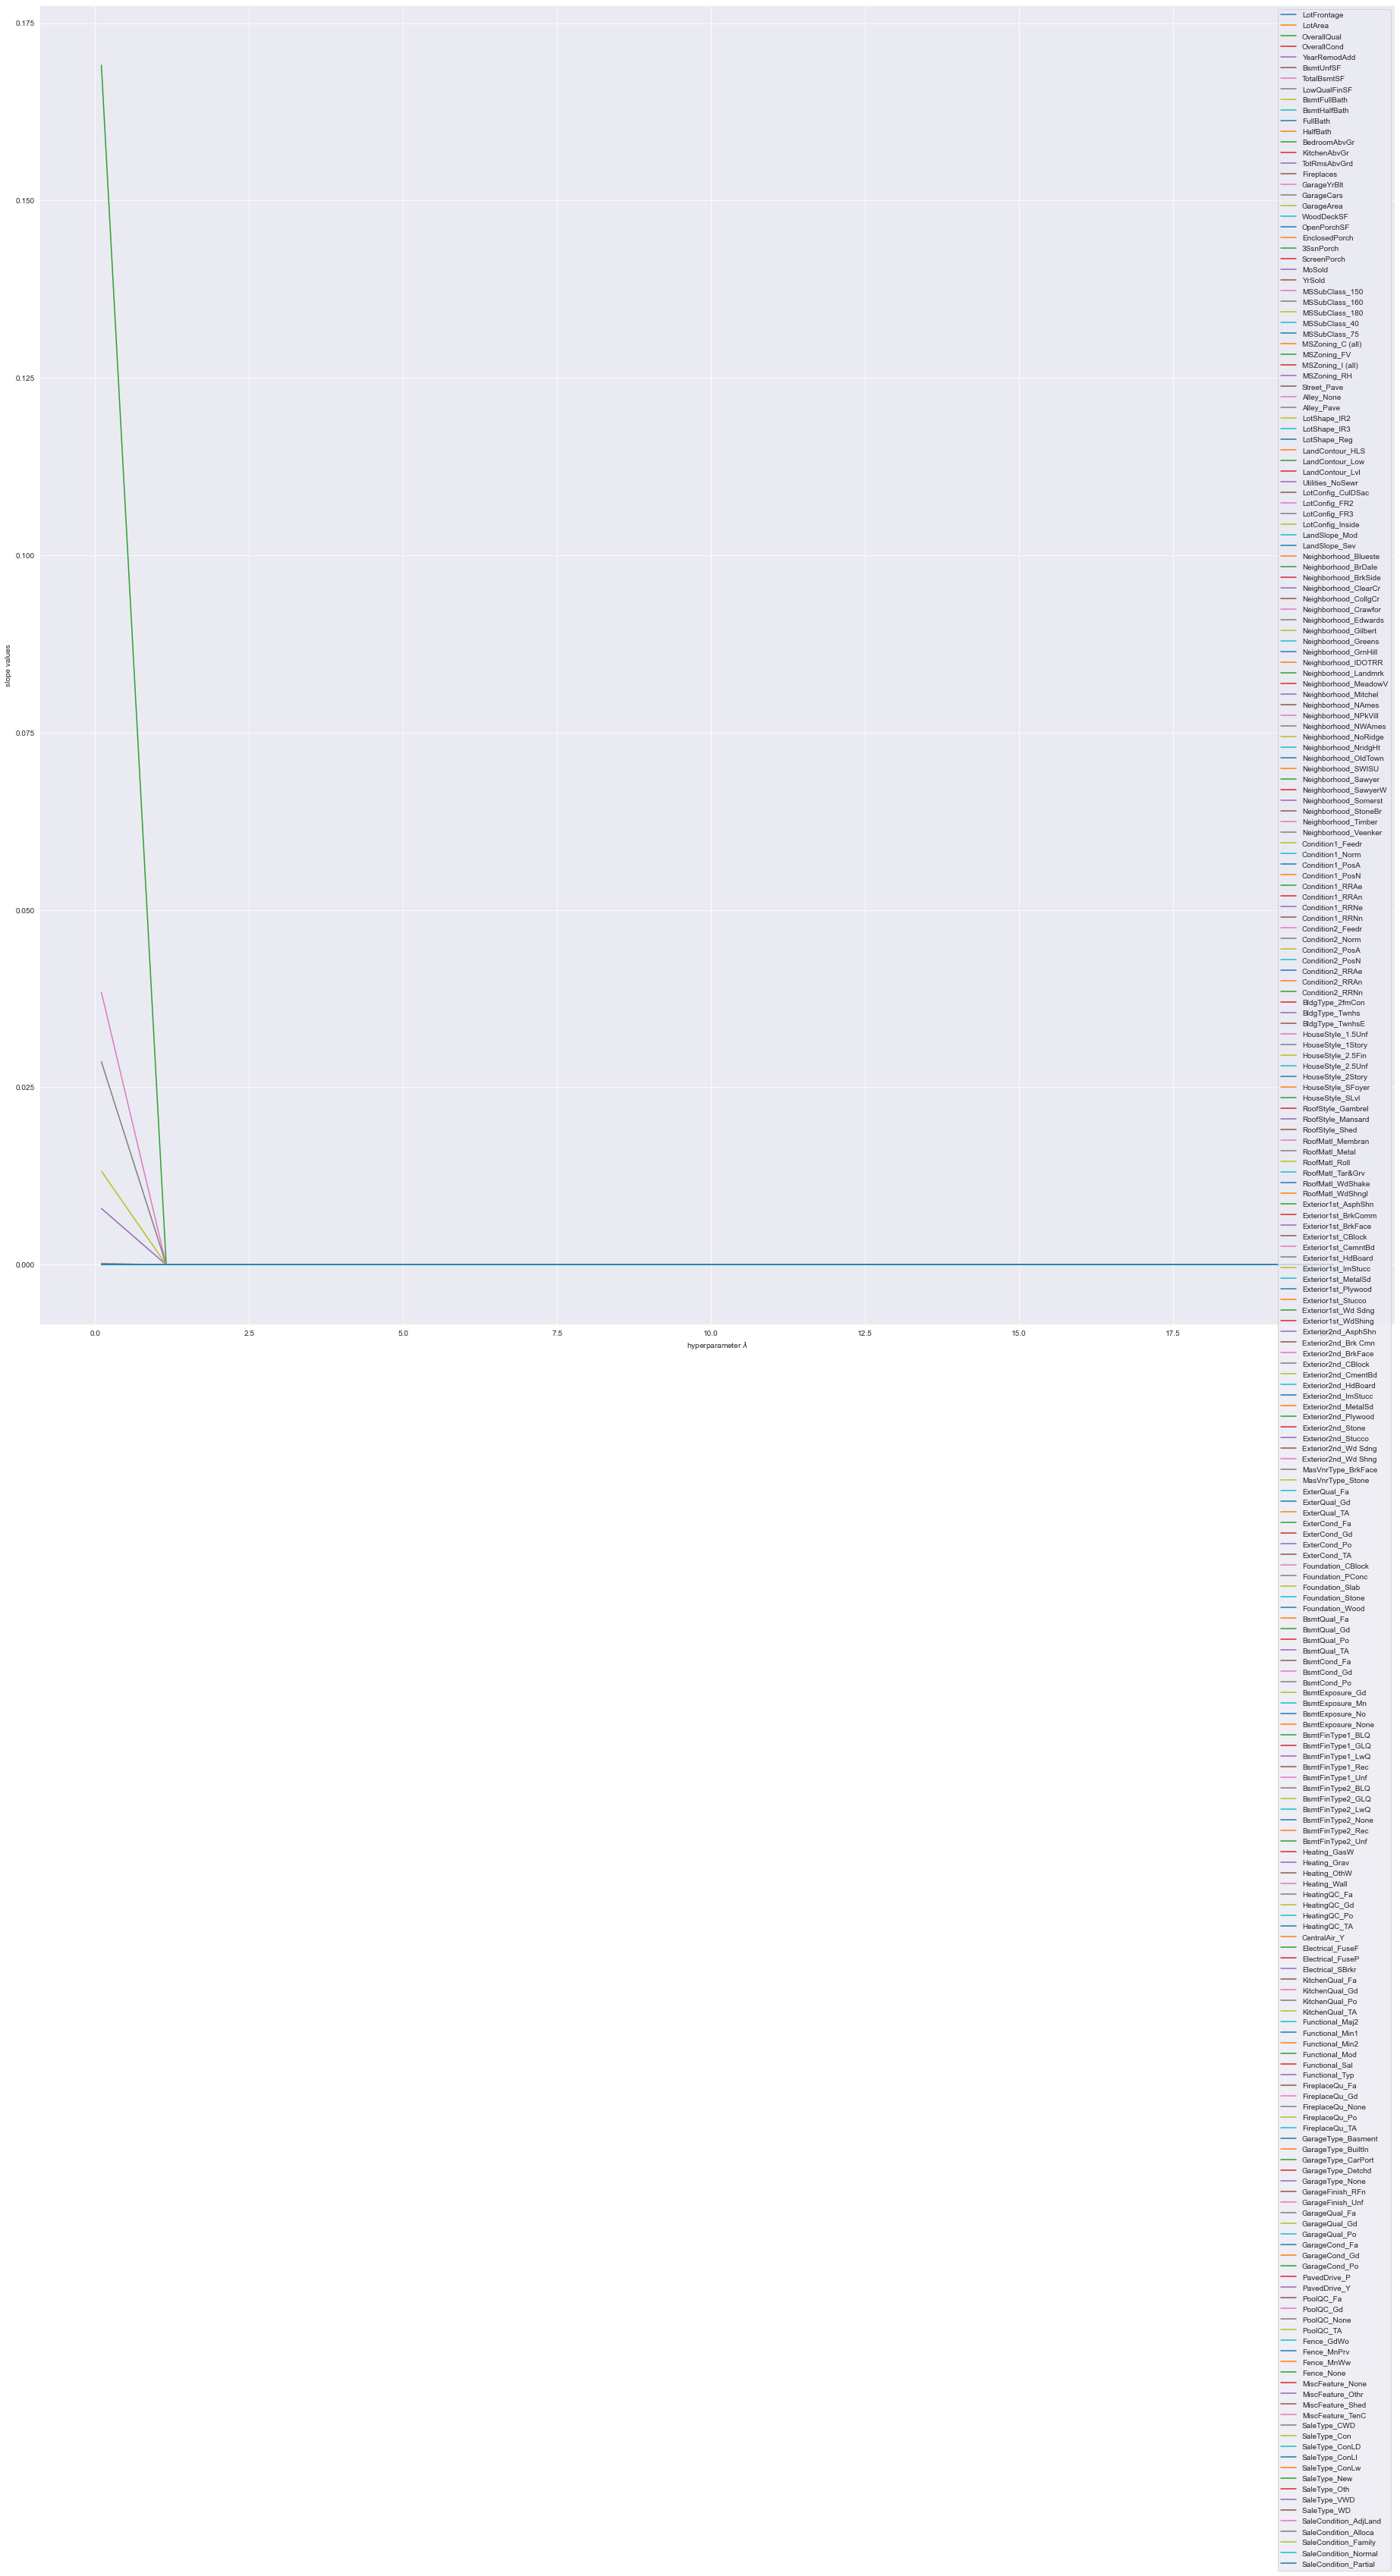

In [666]:
plt.figure(figsize = (32, 32))
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, log_target, test_size=0.3)

In [671]:
lasso.score(X_train, y_train)
print("Train Score", lasso.score(X_train, y_train))
print("Test Score", lasso.score(X_test, y_test))

Train Score -8.960600039786826e-05
Test Score -0.00046199519338596673


In [659]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [660]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=kfold)
print(scores)
np.mean(scores)

[ 9.21094761e-01 -4.63265544e+21 -3.27983593e+24  8.44306398e-01
 -2.63252116e+23 -1.68531405e+23  9.13035335e-01  8.78885040e-01
 -1.62299118e+22 -7.35572023e+22]


-3.806039223563743e+23

In [661]:
results=cross_val_score(lm, df_train, log_target, scoring="neg_mean_squared_error", cv=kfold)
np.mean(-results)

1.300053787632692e+24

In [ ]:
plt.figure(figsize=(16,10))
sns.displot(-results, kde=True)

In [ ]:
df_raw.SalePrice

In [ ]:
#test one more time for MLR
results_MLR=cross_val_score(lm, df_train, log_target, scoring="neg_mean_squared_error", cv=kfold)
results_MLR
np.sqrt(np.mean(-results_MLR))

# Grid Search `GridSearchCV`

# Here

In [ ]:
#cross_score_val vs 
#train_test_split

In [ ]:
#Submit to get a Kaggle score